In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Image processing
import cv2

# Mathematical functions
import math

# Machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split

# Deep learning
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout
from keras.models import Model

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
import os


In [2]:
transactions = pd.read_csv("D:/DeepLearning/H&M/transactions_train.csv")
transactions = transactions.dropna()

In [3]:
transactions['article_id'] = transactions['article_id'].astype(int)
# Count how often the different articles were bought
article_counts = transactions['article_id'].value_counts()

# Display the 10 most frequently bought products
top_10_articles = article_counts.head(10)

# Print the results
print("Top 10 most frequently bought products:")
print(top_10_articles)


Top 10 most frequently bought products:
article_id
706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
464297007    25025
372860002    24458
610776001    22451
399223001    22236
706016003    21241
Name: count, dtype: int64


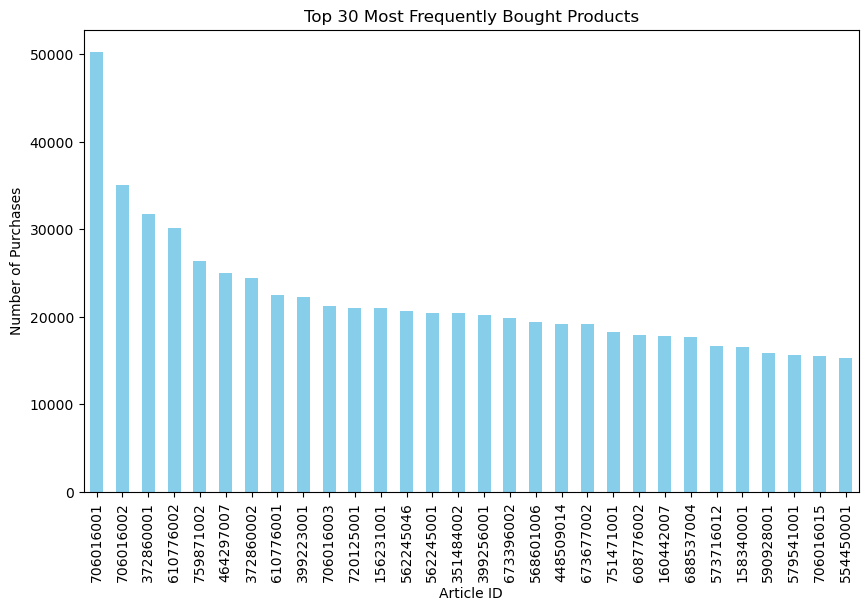

In [4]:
import matplotlib.pyplot as plt

# Count how often the different articles were bought
article_counts = transactions['article_id'].value_counts()

# Select the top 30 most frequently bought products
top_30_articles = article_counts.head(30)

# Plot the most frequently bought products as a bar plot
top_30_articles.plot(kind="bar", figsize=(10, 6), color='skyblue')

# Add labels and title
plt.xlabel('Article ID')
plt.ylabel('Number of Purchases')
plt.title('Top 30 Most Frequently Bought Products')

# Show the plot
plt.show()


Error loading image for Article 610776002: [Errno 2] No such file or directory: 'D:/DeepLearning/H&M/images_128_128/061\\0610776002.jpg'
Error loading image for Article 610776001: [Errno 2] No such file or directory: 'D:/DeepLearning/H&M/images_128_128/061\\0610776001.jpg'


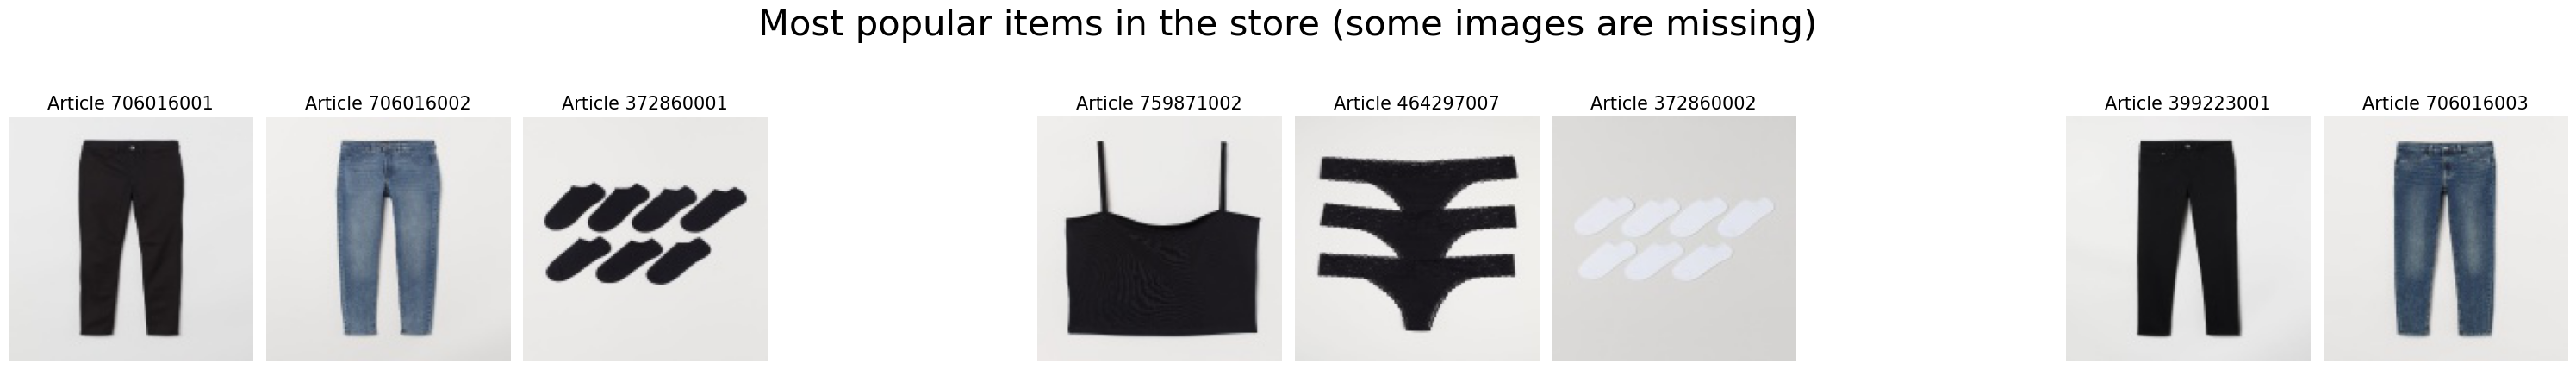

In [6]:
popular_products = transactions['article_id'].value_counts()
popular_items = popular_products.head(10).index  # Assuming 'popular_products' is defined earlier in your code
fig = plt.figure(figsize=(30, 5))

plt.suptitle('Most popular items in the store (some images are missing)', size=30)
plt.axis('off')

for item, i in zip(popular_items, range(1, len(popular_items) + 1)):
    try:
        article_id = str(item).zfill(5)  # Ensure consistent length with leading zeros
        path = os.path.join("D:/DeepLearning/H&M/images_128_128/", f"0{article_id[:2]}", f"0{article_id}.jpg")
        image = plt.imread(path)
        
        plt.subplot(1, len(popular_items), i)
        plt.title(f'Article {item}', size=15)
        plt.axis('off')
        plt.imshow(image)
    except Exception as e:
        print(f"Error loading image for Article {item}: {e}")

plt.tight_layout()
plt.show()

In [7]:
import os
# Load the articles data
articles = pd.read_csv("D:/DeepLearning/H&M/articles.csv")
articles = articles.head(25000)
# Function to check if image exists for an article
def image_exists(row):
    article_id = str(row['article_id']).zfill(5)
    path = os.path.join("D:/DeepLearning/H&M/images_128_128", f"0{article_id[:2]}", f"0{article_id}.jpg")
    return os.path.isfile(path)

# Create a new column 'image_exists' based on the function
articles['image_exists'] = articles.apply(image_exists, axis=1)

# Filter out articles with missing images
articles_with_images = articles[articles['image_exists'] == 1]

# Optionally, drop the 'image_exists' column if it's no longer needed
articles = articles.drop('image_exists', axis=1)

# Display the updated DataFrame
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [8]:
articles.shape

(25000, 25)

In [9]:
articles['detail_desc'].head()

0              Jersey top with narrow shoulder straps.
1              Jersey top with narrow shoulder straps.
2              Jersey top with narrow shoulder straps.
3    Microfibre T-shirt bra with underwired, moulde...
4    Microfibre T-shirt bra with underwired, moulde...
Name: detail_desc, dtype: object

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a TF-IDF Vectorizer Object. Remove all English stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Replace NaN with an empty string
articles['detail_desc'] = articles['detail_desc'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(articles['detail_desc'])

# Output the shape of tfidf_matrix
print(tfidf_matrix.shape)

# Array mapping from feature integer indices to feature name.
feature_names = tfidf.get_feature_names_out()
print(feature_names[100:110])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

(25000, 1908)
['17x34x36' '18' '180' '18m' '18x23' '18x24' '19' '19x30x39' '19x38x44'
 '19x42']


In [11]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [12]:
cosine_sim.shape

(25000, 25000)

In [13]:
cosine_sim[1]

array([1., 1., 1., ..., 0., 0., 0.])

In [14]:
#Construct a reverse map of indices
indices = pd.Series(articles.index, index=articles['article_id']).drop_duplicates()

In [15]:
indices[:10]

article_id
108775015    0
108775044    1
108775051    2
110065001    3
110065002    4
110065011    5
111565001    6
111565003    7
111586001    8
111593001    9
dtype: int64

In [16]:
def get_recommendations(article_id, cosine_sim=cosine_sim, top_n=10):
    # Check if the article ID exists in the mapping
    if article_id not in indices:
        print(f"Article ID {article_id} not found.")
        return []

    # Get the index of the article that matches the ID
    idx = indices[article_id]

    # Get the pairwsie similarity scores of all articles with that article
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the articles based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top N most similar articles
    sim_scores = sim_scores[1:(top_n + 1)]

    # Get the articles indices
    article_indices = [i[0] for i in sim_scores]

    # Return the top N most similar articles
    return articles['article_id'].iloc[article_indices]

In [17]:
recommendations = get_recommendations(150959011)
print(recommendations)

56       150959013
3807     466891001
3808     466891002
3568     458064001
440      241486015
441      241486016
12336    552788001
449      242354009
3806     466852005
17091    572931001
Name: article_id, dtype: int64


In [18]:
indices[:10]

article_id
108775015    0
108775044    1
108775051    2
110065001    3
110065002    4
110065011    5
111565001    6
111565003    7
111586001    8
111593001    9
dtype: int64

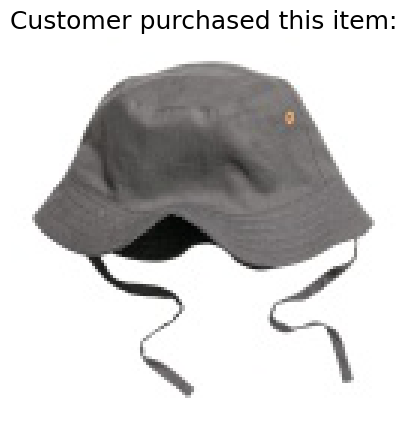

In [19]:
import os
import cv2
import matplotlib.pyplot as plt

BASE_DIR = "D:/DeepLearning/H&M/images_128_128/"
item = 588490001  # Test a random item

# Format file path using os.path.join
image_path = os.path.join(BASE_DIR, f"0{str(item)[:2]}", f"0{item}.jpg")

# Check if the file exists
if os.path.exists(image_path):
    plt.figure(figsize=(20, 5))
    img = cv2.imread(image_path)[:, :, ::-1]
    plt.title('Customer purchased this item:', size=18)
    plt.axis('off')
    plt.imshow(img)
    plt.show()
else:
    print(f"File not found: {image_path}")


In [20]:
# see results here
recommendations = get_recommendations(item)
print(recommendations)

20332    588490002
16948    572255001
18378    578764001
16946    572254001
16947    572254004
250      205225001
14306    562280001
14307    562280002
22524    598811003
22525    598811005
Name: article_id, dtype: int64


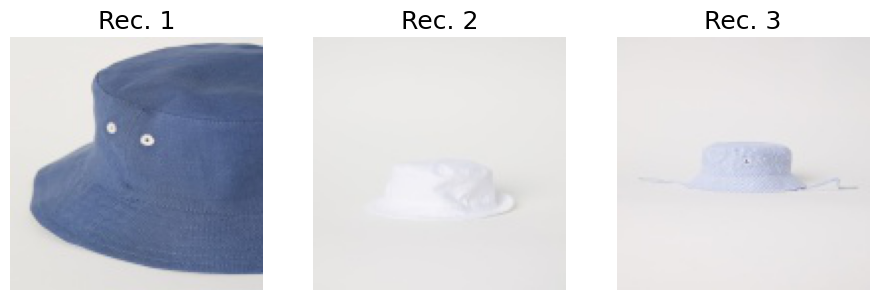

In [21]:
import os
import cv2
import matplotlib.pyplot as plt

BASE = "D:/DeepLearning/H&M/images_128_128/"

# Assuming recommendations is a DataFrame with item IDs
item_ids = recommendations.iloc[:3]

# Format file paths using os.path.join
file_paths = [os.path.join(BASE, f"0{str(item)[:2]}", f"0{item}.jpg") for item in item_ids]

# Check and display images
plt.figure(figsize=(15, 5))
for i, file_path in enumerate(file_paths, start=1):
    if os.path.exists(file_path):
        img = cv2.imread(file_path)[:, :, ::-1]
        plt.subplot(1, 4, i)
        plt.title(f'Rec. {i}', size=18)
        plt.axis('off')
        plt.imshow(img)
    else:
        print(f"File not found: {file_path}")

plt.show()
